# 1. Blocker Fraud Company
 <font size="2"> Dados e problema negócio hipotéticos</font>
 
A Blocker Fraud Company é uma empresa especializada na detecção de fraudes em transações financeiras feitas atravś de dispositivos móveis.

O modelo de negócio da empresa é do tipo Serviço com a monetização feita por performance do serviço prestado, ou seja, o usuário paga uma taxa fixa sobre o sucesso da detecção de fraude das transações.

## 1.1. Estratégia de expansão

A Blocker Fraud Company está em fase de expansão no Brasil e para adquirir clientes mais rapidamente, ela adotou uma estratégia muito agressiva. A estratégia funciona da seguinte forma:

1. A empresa vai receber 25% do valor de cada transação detectada verdadeiramente como fraude.
2. A empresa vai receber 5% do valor de cada transação detectada como fraude, porém a transação é verdadeiramente legítima.
3. A empresa vai devolver 100% do valor para o cliente, a cada transação detectada como legítima, porém a transação é verdadeiramente uma fraude.

Com essa estratégia agressiva a empresa assume os riscos em falhar na detecção de fraude e é remunerada na detecção assertiva das fraudes.

## 1.2. Objetivo

Criar um modelo de alta precisão e acurácia na detecção de fraudes de transações feitas através de dispositivos móveis.

### 1.2.1. Entregáveis

Modelo em produção no qual seu acesso será feito via API, ou seja, os clientes enviarão suas transações via API para que o seu modelo as classifique como fraudulentas ou legítimas.

Além disso, você precisará entregar um relatório reportando a performance e os resultados do seu modelo em relação ao lucro e prejuízo que a empresa terá ao usar o modelo que você produziu. No seu relatório deve conter as respostas para as seguintes perguntas:

1. Qual a Precisão e Acurácia do modelo?
2. Qual a Confiabilidade do modelo em classificar as transações como legítimas ou fraudulentas?
3. Qual o Faturamento Esperado pela Empresa se classificarmos 100% das transações com o modelo?
4. Qual o Prejuízo Esperado pela Empresa em caso de falha do modelo?
5. Qual o Lucro Esperado pela Blocker Fraud Company ao utilizar o modelo?


# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#display
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## 2.1. Utils functions

# 3. Data

## 3.1. Load dataset

In [2]:
df = pd.read_parquet('../data/raw/df_train.parquet.gzip')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0
2,1,TRANSFER,181.00000,C1305486145,181.00000,0.00000,C553264065,0.00000,0.00000,1,0
3,1,CASH_OUT,181.00000,C840083671,181.00000,0.00000,C38997010,21182.00000,0.00000,1,0
4,1,PAYMENT,11668.14000,C2048537720,41554.00000,29885.86000,M1230701703,0.00000,0.00000,0,0


# 4 Exploratory data analysis

## 4.1. Data types

In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6298994 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6298994 non-null  int64  
 1   type            6298994 non-null  object 
 2   amount          6298994 non-null  float64
 3   nameOrig        6298994 non-null  object 
 4   oldbalanceOrg   6298994 non-null  float64
 5   newbalanceOrig  6298994 non-null  float64
 6   nameDest        6298994 non-null  object 
 7   oldbalanceDest  6298994 non-null  float64
 8   newbalanceDest  6298994 non-null  float64
 9   isFraud         6298994 non-null  int64  
 10  isFlaggedFraud  6298994 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 576.7+ MB


Como vimos no notebook anterior, percebemos que o dataset não possui valores nulos, olhando também os tipos das variáveis podemos definir que os tipos estão corretos, não existe a necessidade de trocar algum tipo atual para outro desejado.

## 4.2. Analysis

In [5]:
num_attributes = df.select_dtypes( include=['int64', 'float64'] )

In [6]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,step,1.00000,743.00000,742.00000,243.39388,239.00000,142.33325,0.37531,0.32919
1,amount,0.00000,92445516.64000,92445516.64000,179858.47592,74857.85500,604367.91687,31.07136,1805.42315
2,oldbalanceOrg,0.00000,59585040.37000,59585040.37000,833819.93275,14210.98500,2887940.20645,5.24905,32.96327
3,newbalanceOrig,0.00000,49585040.37000,49585040.37000,855054.43253,0.00000,2923734.60445,5.17670,32.06363
4,oldbalanceDest,0.00000,356015889.35000,356015889.35000,1100603.99191,132714.48500,3396637.14713,19.83437,939.63179
5,newbalanceDest,0.00000,356179278.92000,356179278.92000,1224920.84889,214639.38500,3672694.80057,19.29652,856.34156
6,isFraud,0.00000,1.00000,1.00000,0.00129,0.00000,0.03589,27.78961,770.26270
7,isFlaggedFraud,0.00000,1.00000,1.00000,0.00000,0.00000,0.00159,627.44268,393682.43750


Como vimos no notebook anterior temos o resumo estatísticos das variáveis númericas, adicionamos aqui a análise das skewness e kurtosis, com isso possuimos:

Skewness: é a medida do quanto uma distribuição de dados desvia de uma distribuição normal, sendo que a normal não possui skewness, ou seja, os dados estão distribuídos perfeitamento ao redor da média. Uma skewness positiva é quando a mediana é menor que a média, sendo um deslocamento para a esquerda e quando for negativa encontramos a mediana maior que a média e um deslocamento para a direita, assim nos mostrando a onde os dados estão concentrados. 

Kurtosis: descreve a distribuição dos dados em torno da média, evidenciando assim a distribuição de caudas longas (mostra a probabilidade baixa e/ou alta de acontecer valores extremos).

- **step**: Como é um valor incremental temos valores baixos de skew e kurtosis sobre a distribuição dos dados, ficando bem próximo de uma normal.
- **amount**: Valores extremamente altos tanto para skew e para kurtosis, deslocando a distribuição para a esquerda e kurtosis evidenciando uma calda longa, a distribuição será bastante concentrada no começo da distribuição.
- **oldbalanceOrg**: Segue os valores altos para a skew nos mostrando um deslocamento para a esquerda evidenciando uma concentração de dados no início da distribuição e sendo constituído por uma calda longa.
- **newbalanceOrig**: Segue os valores altos para a skew nos mostrando um deslocamento para a esquerda evidenciando uma concentração de dados no início da distribuição e sendo constituído por uma calda longa.
- **oldbalanceDest**: Segue os valores altos para a skew nos mostrando um deslocamento para a esquerda evidenciando uma concentração de dados no início da distribuição e sendo constituído por uma calda longa.
- **newbalanceDest**: Segue os valores altos para a skew nos mostrando um deslocamento para a esquerda evidenciando uma concentração de dados no início da distribuição e sendo constituído por uma calda longa.
- **isFraud**: Pelo valores podemos perceber a falta de balanceamento, sendo assim vai ser necessário alguma transformação para que o algoritmo escolhido seja eficiente em identificar padrões. Fazeremos dessa variável o nosso target, aquele que queremos prever.
- **isFlaggedFraud**: Identifica uma concentração de valores no inicio evidenciando assim um deslocamento para a esquerda e constituído por uma calda longa.

**Análises dos valores**

Será de importância a transformação dessas variáveis númericas, pois é evidenciado que os valores não seguem uma distribuição normal, além disso é indicado o tratamento da variável resposta pelo motivo dela não ser balanceado e sendo assim a probabilidade de o algoritmo não identificar corretamente os padrões.

Nas próximas seções iremos analisar as variáveis de forma univariada e multivariada (próximo notebook).

### 4.2.1. Univariate analysis

Na etapa da estatística descritivas percebemos que as variáveis possuem uma distribuição não ideal para o objetivo que temos, para isso vamos analisar individualmente as variáveis para que seja possível extrair insights e aprendizado sobre elas.

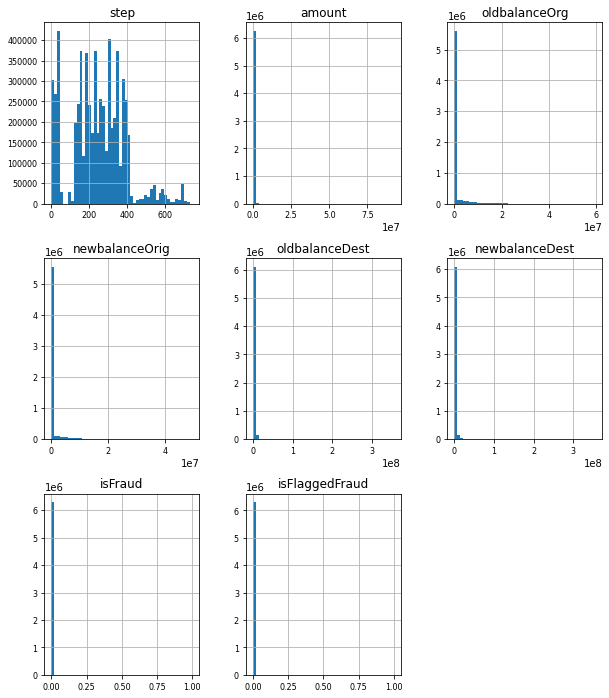

In [7]:
df.hist(figsize=(10, 12), bins=50, xlabelsize=8, ylabelsize=8);

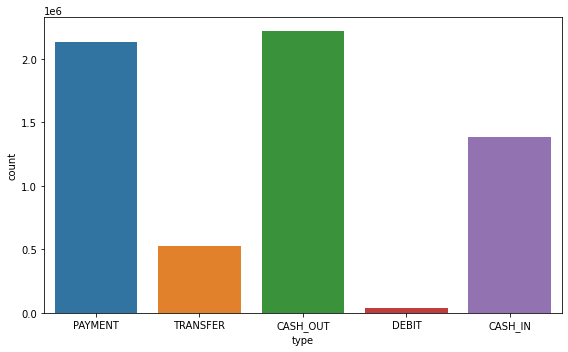

In [8]:
plt.subplots(figsize=(8,5))
sns.countplot(x='type', data=df)
plt.tight_layout()

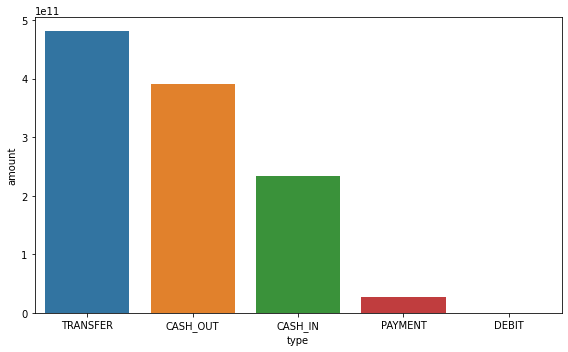

In [9]:
plt.subplots(figsize=(8,5))
sns.barplot(x='type', y='amount', data=df.groupby('type').agg({'amount':'sum'}).reset_index().sort_values('amount', ascending=False))
plt.tight_layout()

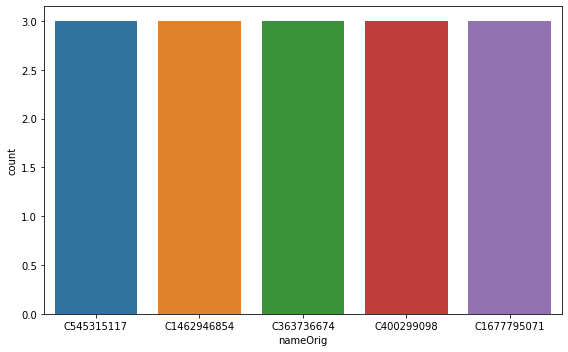

In [10]:
plt.subplots(figsize=(8,5))
sns.countplot(x='nameOrig', data=df,
              order=df.nameOrig.value_counts().iloc[:5].index)
plt.tight_layout()

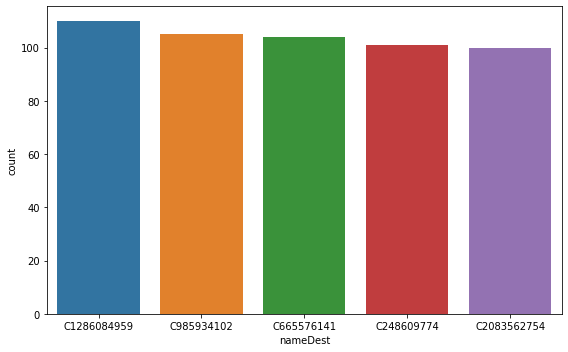

In [11]:
plt.subplots(figsize=(8,5))
sns.countplot(x='nameDest', data=df,
              order=df.nameDest.value_counts().iloc[:5].index)
plt.tight_layout()

In [12]:
df['nameOrig'].str.contains('M').sum()

0

In [13]:
df['nameDest'].str.contains('M').sum()

2129934

**Análise dos valores**

- **step**: Existe uma concentração no inicio, porém após aparentemente se assimilia à uma normal, mas vemos uma queda acentuada após o step aproximado de 50, voltando no step aproximademente 100. Após esse período vemos alguns picos e quedas de transações efetuadas. Após o o step aproximado de 400 existe outra queda e se mantém com um número de transações bem abaixo dos períodos anteriores. 
- **Restante das variáveis númericas**: só mostra graficamente o que já sabemos a partir da skewness e kurtosis, uma alta concentração no início e uma calda longa.
- **type**: o método TRANSFER e CASH_OUT são de longe os mais utilizados pelos usuários e o método DEBIT o menos utilizado. Além disso o método TRANSFER é aquele que tem o maior soma de transações.
- **nameDest e nameOrig**: Verificamos os usuários que mais utilizam o serviço, e aparentemente os usuários marcados com M não são os top 5 e também não temos usuários de origem rotulados com M.

Aqui podemos identificar algumas coisas para os passos futuros, falando da etapa de *feature engineering*, podemos criar uma relacionado ao balanços onde fazeremos a diferença entre os balanços com a transação efetuada, resultado no valor de origem e repetindo o processo para os de destino.
Olhando as variáveis categóricas, devemos criar uma variável onde identificamos aqueles usuários que são rotulados com o M para diferenciar do restante.

Também podemos verificar quais **type** mais se relaciona com a fraude, quais são os usuários que tiveram transações rotuladas como fraude pelo sistema, etc. Essa etapa será realizada na etapa de Hypothesis List.

# 5. Conclusão

Em uma análise mais aprofundada individuamente, vemos a importância que será a aplicação de tratamento das variáveis para que seja possível usar no poder preditivo do algoritmo. Também podemos concluir que a variável resposta está extremamente não balanceada e será necessário o balanceamento.

Dado isso, podemos avançar para a criação de hipóteses dos dados para que seja possível também a análise multivariada das variáveis e seus valores, gerando valor para a empresa e aumentando a confiança nos dados para as etapas de modelagem e aplicação de algoritmos de machine learning.